In [ ]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from scipy import stats

In [ ]:
#IMPORTANDO OS DADOS
df=pd.read_csv('ex1data1.txt',header=None)
df.columns=['x1','y']

df.insert(loc=0, column='x0', value=1)

In [ ]:
#MOSTRANDO OS DADOS
df.head()

,x0,x1,y
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [ ]:
#DEFININDO PARAMETROS
alfa= 0.001;
epocas=1000;

w=np.random.randn(1, 2)[0]/100

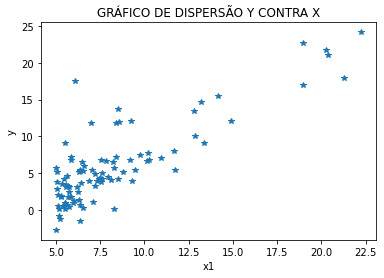

In [ ]:
#DISTRIBUIÇÃO
plt.plot(df.x1,df.y,'*')
plt.title('GRÁFICO DE DISPERSÃO Y CONTRA X')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [ ]:
#ALGORITMO DO GRADIENTE DESCENDENTE ESTOCÁSTICO
data=df.values
eqm=[]
for i in range(epocas):
    np.random.shuffle(data)
    sum_eqm=0
    for instance in data:
        x=instance[0:2]
        y=instance[2]
        y_h=np.matmul(w,x)
        erro=y-y_h
        sum_eqm=sum_eqm+(erro*erro)
        w[0] = w[0] + alfa*erro;
        w[1] = w[1] + alfa*erro*x[1]
    eqm.append(sum_eqm/len(data))

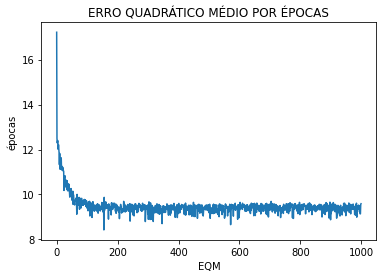

In [ ]:
#PLOT DO ERRO QUADRÁTICO MÉDIO
plt.plot(eqm)
plt.title('ERRO QUADRÁTICO MÉDIO POR ÉPOCAS')
plt.xlabel('EQM')
plt.ylabel('épocas')
plt.show()

In [ ]:
#NA MEDIDA QUE AS ÉPOCAS PASSAM O EQM DIMINUI, O QUE INDICA O APRENDIZADO.

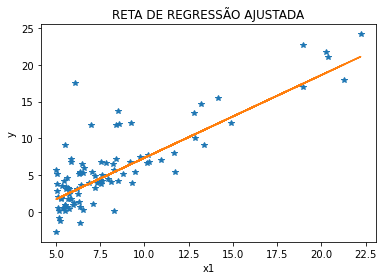

In [ ]:
#PLOT DA RETA DE REGRESSÃO
plt.plot(df.x1,df.y,'*')
plt.plot(df.x1,np.matmul(df[['x0','x1']].values,w),'-')
plt.title('RETA DE REGRESSÃO AJUSTADA')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

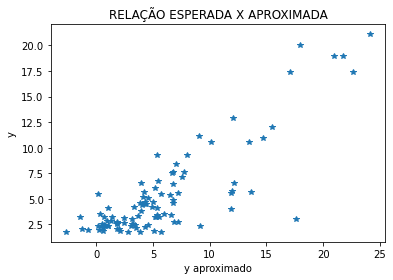

In [ ]:
#PLOT DA SAÍDA ESPERADA X SAÍDA APROXIMADA

#QUANTO MAIS OS DADOS APROXIMADOS DA VARIÁVEL DE RESPOSTA SE APROXIMAR DOS DADOS ORIGINAIS, MAIS A DISTRIBUIÇÃO
#DELES SE ASSEMELHARÁ A UMA RETA.
plt.plot(df.y,np.matmul(df[['x0','x1']].values,w),'*')
plt.title('RELAÇÃO ESPERADA X APROXIMADA')
plt.xlabel('y aproximado')
plt.ylabel('y')
plt.show()

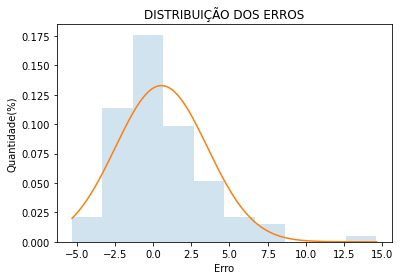

In [ ]:
#DISTRIBUIÇÃO DOS ERROS

#QUANTO MAIS A DISTRIBUIÇÃO DOS ERROS SE APROXIMA DE UMA DISTRIBUIÇÃO NORMAL, MELHOR É O MODELO.
vetor_erros=list(df.y-np.matmul(df[['x0','x1']].values,w))
u,std=stats.norm.fit(vetor_erros)
plt.hist(vetor_erros,density=True, histtype='stepfilled', alpha=0.2)
x_lin=np.linspace(min(vetor_erros),max(vetor_erros),200)
pdf=stats.norm.pdf(x_lin,u,std)
plt.plot(x_lin,pdf)
plt.title('DISTRIBUIÇÃO DOS ERROS')
plt.xlabel('Erro')
plt.ylabel('Quantidade(%)')
plt.show()